In [1]:
import librosa
import librosa.display
from python_speech_features import mfcc, logfbank

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os

import IPython.display as ipd


## IMPORT AND CLEAN DATA

In [2]:
df = pd.read_csv('data/data.csv')
from src.eda import eda_data
df = eda_data(df)
df.head()

filename  emotion  gender  type
0  audio/tess/OAF_fat_neutral.wav  neutral  female  tess
1    audio/tess/YAF_boat_fear.wav  fearful  female  tess
2   audio/tess/YAF_fall_angry.wav    angry  female  tess
3   audio/tess/YAF_have_happy.wav    happy  female  tess
4      audio/tess/YAF_mob_sad.wav      sad  female  tess

## LISTEN TO AUDIOS

In [3]:
audio_dict = {
'neutral' : 'audio/ravdess/Actor_01/03-01-01-01-01-02-01.wav',
'happy' : 'audio/ravdess/Actor_01/03-01-03-02-01-02-01.wav',
'sad' : 'audio/ravdess/Actor_01/03-01-04-02-01-02-01.wav',
'angry' : 'audio/ravdess/Actor_01/03-01-05-02-01-02-01.wav',
'fearful' : 'audio/ravdess/Actor_01/03-01-06-02-01-02-01.wav',
'disgust' : 'audio/ravdess/Actor_01/03-01-07-02-01-02-01.wav',
'surprised' : 'audio/ravdess/Actor_01/03-01-08-02-01-02-01.wav',
}

In [4]:
audio_path = audio_dict['neutral']
neutral , sr = librosa.load(audio_path)
ipd.Audio(audio_path)

In [5]:
audio_path = audio_dict['happy']
happy , sr = librosa.load(audio_path)
ipd.Audio(audio_path)

In [6]:
audio_path = audio_dict['sad']
sad , sr = librosa.load(audio_path)
ipd.Audio(audio_path)

In [7]:
audio_path = audio_dict['angry']
angry , sr = librosa.load(audio_path)
ipd.Audio(audio_path)

In [8]:
audio_path = audio_dict['fearful']
fearful , sr = librosa.load(audio_path)
ipd.Audio(audio_path)

In [9]:
audio_path = audio_dict['disgust']
disgust , sr = librosa.load(audio_path)
ipd.Audio(audio_path)

In [10]:
audio_path = audio_dict['surprised']
surprised , sr = librosa.load(audio_path)
ipd.Audio(audio_path)

## DATA DISTRIBUTIONS

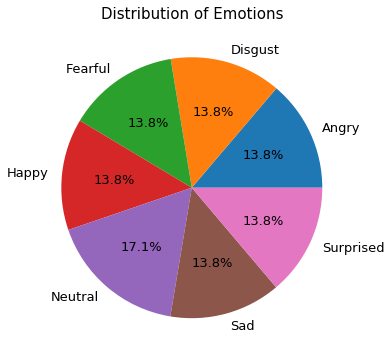

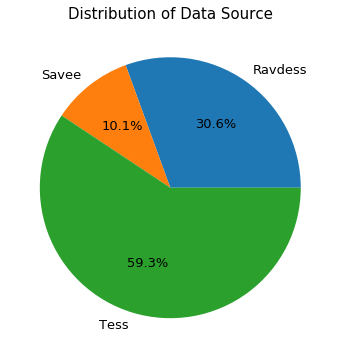

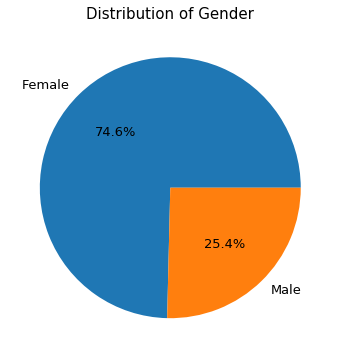

In [11]:
from src.eda import distributions
distributions(df, 'emotion', 'Emotions')
distributions(df, 'type', 'Data Source')
distributions(df, 'gender', 'Gender')

## GRAPH FREQUENCIES

In [12]:
from src.eda import calc_fft, frequencies

signals, fft, fbank, mfccs = frequencies(df)

### WAVEPLOTS

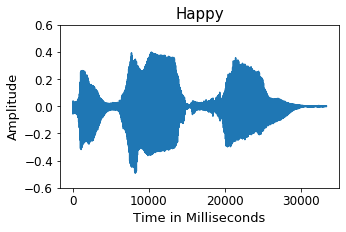

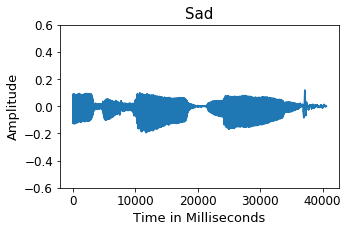

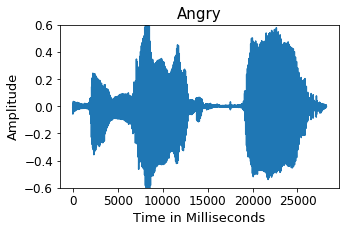

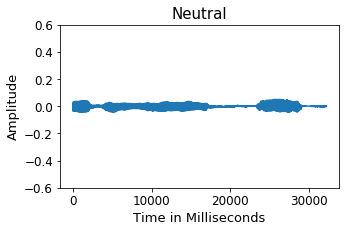

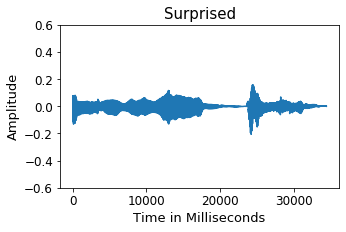

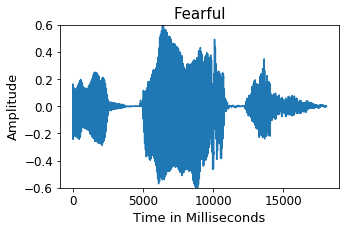

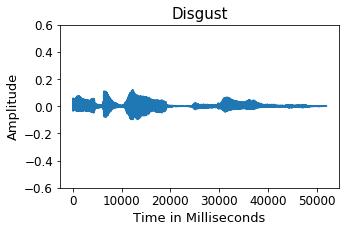

In [13]:
for idx, emotion in enumerate(list(signals.keys())):
    fig, ax = plt.subplots(figsize=(5,3))
    ax.plot(list(signals.values())[idx])
    ax.set_title(list(signals.keys())[idx].capitalize(), fontsize=15)
    ax.set_xlabel('Time in Milliseconds', fontsize=13)
    ax.set_ylim(bottom=-.6, top=.6)
    ax.tick_params(axis='both', labelsize=12)
    ax.set_ylabel('Amplitude', fontsize=13)

### FBANKS

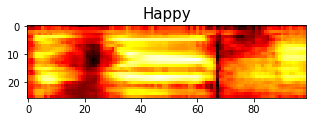

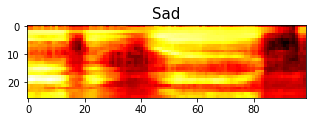

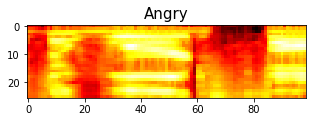

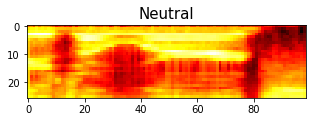

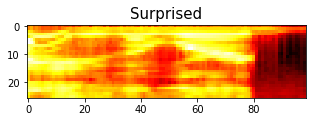

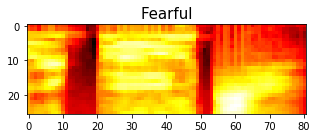

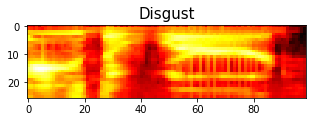

In [14]:
for idx, emotion in enumerate(list(fbank.keys())):
    fig, ax = plt.subplots(figsize=(5,3))
    ax.imshow(list(fbank.values())[idx], cmap='hot', interpolation='nearest')
    ax.set_title(list(fbank.keys())[idx].capitalize(), {'fontsize':15})

### MFCCS

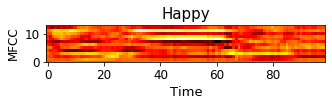

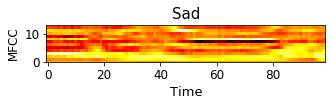

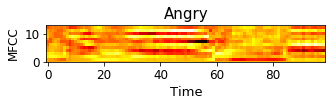

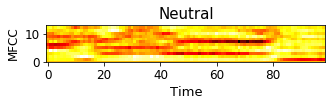

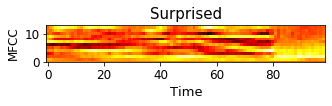

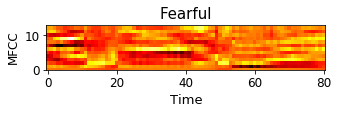

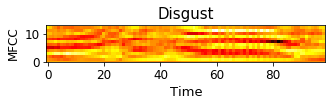

In [19]:
for idx, emotion in enumerate(list(mfccs.keys())):
    fig, ax = plt.subplots(figsize=(5,10))
    ax.imshow(list(mfccs.values())[idx], cmap='hot')
    ax.set_title(list(mfccs.keys())[idx].capitalize(), {'fontsize': 15})
    ax.tick_params(axis='both', labelsize=12)
    ax.set_xlabel('Time', fontsize=13)
    ax.set_ylim(bottom=0, top=13)
    ax.set_ylabel('MFCC', fontsize=12)

    

## GRAPHS OF ONE INDIVIDUAL

### WAVEPLOT

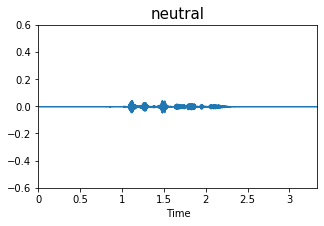

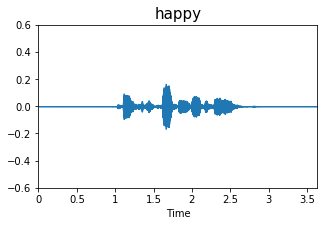

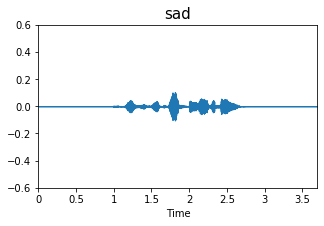

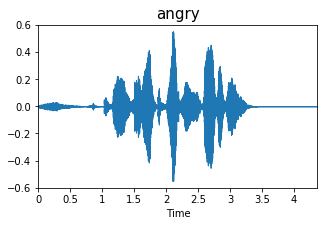

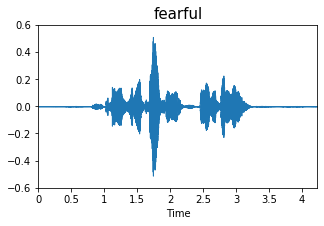

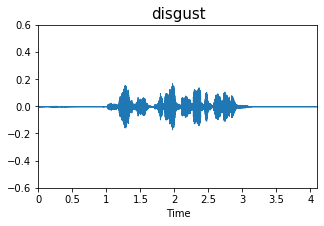

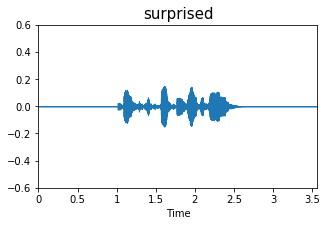

In [20]:
for emotion in list(audio_dict.keys()):
    plt.figure(figsize=(5,3))
    y, sr = librosa.load(audio_dict[emotion])
    librosa.display.waveplot(y)
    plt.title(emotion, {'fontsize': 15})
    plt.ylim(bottom=-.6, top=.6)

### SPECTROGRAM

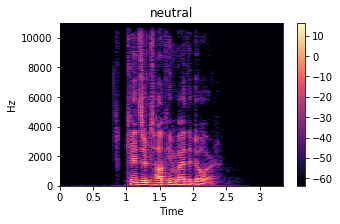

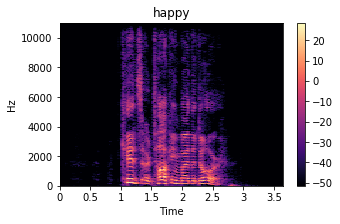

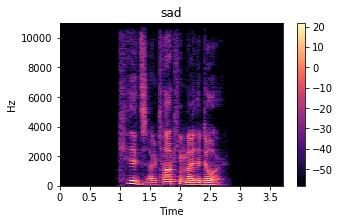

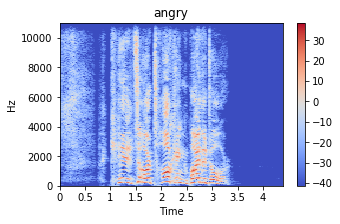

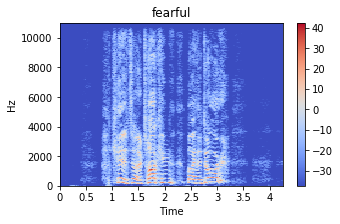

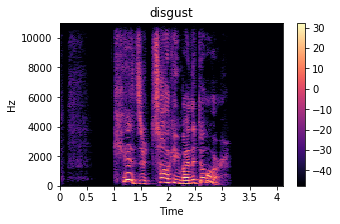

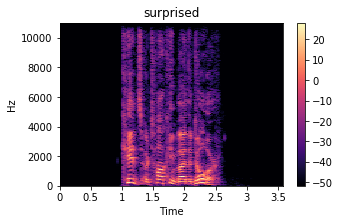

In [21]:
for emotion in list(audio_dict.keys()):
    plt.figure(figsize=(5,3))
    y, sr = librosa.load(audio_dict[emotion])
    X = librosa.stft(y)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
    plt.title(emotion)
    plt.colorbar()
    

### MFCCS

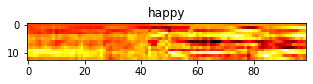

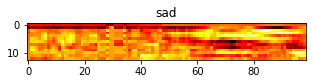

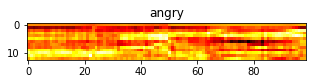

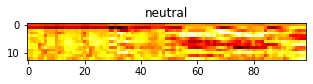

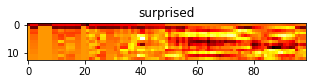

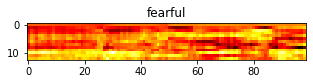

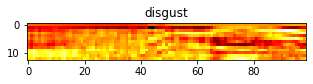

In [22]:
individual_df = pd.DataFrame(columns=['filename', 'emotion'])
emotion = list(audio_dict.keys())
filename = list(audio_dict.values())
for idx, emotion in enumerate(emotion):
    individual_df = individual_df.append({'emotion':emotion, 'filename': filename[idx]}, ignore_index=True)

ind_signals, ind_fft, ind_fbank, ind_mfccs = frequencies(individual_df)
for idx, emotion in enumerate(list(ind_mfccs.keys())):
    fig, ax = plt.subplots(figsize=(5,3))
    ax.imshow(list(ind_mfccs.values())[idx], cmap='hot', interpolation='nearest')
    ax.set_title(list(ind_mfccs.keys())[idx])